In [8]:
import glob
import pydicom
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
images_dir = "../original_dataset/train_subset/*.dicom"
images = glob.glob(images_dir)

In [27]:
test = pydicom.dcmread(images[0], stop_before_pixels=True)

In [28]:
test.BitsStored

12

In [29]:
test.to_json_dict()

{'00100040': {'vr': 'CS', 'Value': ['F']},
 '00101020': {'vr': 'DS', 'Value': [0.0]},
 '00101030': {'vr': 'DS', 'Value': [0.0]},
 '00280002': {'vr': 'US', 'Value': [1]},
 '00280004': {'vr': 'CS', 'Value': ['MONOCHROME2']},
 '00280010': {'vr': 'US', 'Value': [3000]},
 '00280011': {'vr': 'US', 'Value': [2932]},
 '00280034': {'vr': 'IS', 'Value': [1, 1]},
 '00280100': {'vr': 'US', 'Value': [16]},
 '00280101': {'vr': 'US', 'Value': [12]},
 '00280102': {'vr': 'US', 'Value': [11]},
 '00280103': {'vr': 'US', 'Value': [0]},
 '00281050': {'vr': 'DS', 'Value': [2047.0]},
 '00281051': {'vr': 'DS', 'Value': [4095.0]},
 '00281052': {'vr': 'DS', 'Value': [0.0]},
 '00281053': {'vr': 'DS', 'Value': [1.0]},
 '00282110': {'vr': 'CS', 'Value': ['00']}}

In [ ]:
def get_dicom_metadata(images_dir: str):
    images = glob.glob(images_dir)
    metadata_dict = {}
    for image in images:
        image_id = Path(image).stem
        dicom = pydicom.dcmread(image, stop_before_pixels=True)
        metadata = dicom.to_json_dict()
        metadata_dict[image_id] = metadata
    return metadata_dict

In [33]:
metadata = get_dicom_metadata(images_dir)

In [9]:
vindr_test = pd.read_json("vindr_test_metadata.json", orient="index")
vindr_train = pd.read_json("vindr_train_metadata.json", orient="index")

In [12]:
vindr_train_bit_info = vindr_train[[280100, 280101, 280102]]
vindr_test_bit_info = vindr_test[[280100, 280101, 280102]]

In [15]:
columns_to_unpack = [280100, 280101, 280102]
for col in columns_to_unpack:
    vindr_test_bit_info[col] = vindr_test_bit_info.apply(lambda row: row[col]["Value"][0], axis=1)
    vindr_train_bit_info[col] = vindr_train_bit_info.apply(lambda row: row[col]["Value"][0], axis=1)

/var/folders/d0/k5pp1mc555bcl1qs6mvttwt40000gn/T/ipykernel_4577/92230220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vindr_test_bit_info[col] = vindr_test_bit_info.apply(lambda row: row[col]["Value"][0], axis=1)
/var/folders/d0/k5pp1mc555bcl1qs6mvttwt40000gn/T/ipykernel_4577/92230220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vindr_train_bit_info[col] = vindr_train_bit_info.apply(lambda row: row[col]["Value"][0], axis=1)


In [22]:
for col in columns_to_unpack:
    print(vindr_train_bit_info[col].value_counts())
    print(vindr_test_bit_info[col].value_counts())

280100
16    15000
Name: count, dtype: int64
280100
16    3000
Name: count, dtype: int64
280101
12    10609
14     3472
16      860
10       59
Name: count, dtype: int64
280101
12    2073
14     624
16     268
10      35
Name: count, dtype: int64
280102
11    10609
13     3472
15      860
9        59
Name: count, dtype: int64
280102
11    2073
13     624
15     268
9       35
Name: count, dtype: int64


In [19]:
dicom_img = pydicom.dcmread("../original_dataset/test_subset/0aed23e64ebdea798486056b4f174424.dicom")
data = dicom_img.pixel_array
data

/Users/kaichenchai/.pyenv/versions/mini_vindr_cxr_dataset/lib/python3.11/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


array([[4091, 4089, 4092, ..., 4095, 4095, 4095],
       [4091, 4089, 4092, ..., 4095, 4095, 4095],
       [4089, 4091, 4089, ..., 4095, 4094, 4095],
       ...,
       [4092, 4092, 4093, ..., 4094, 4095, 4094],
       [4091, 4091, 4092, ..., 4093, 4094, 4094],
       [4094, 4094, 4092, ..., 4093, 4092, 4092]], dtype=uint16)

In [14]:
data.max()

4095

In [18]:
dicom_img.BitsStored

12

In [ ]:
data = data.astype(np.uint32)
data = (data * 2**16) / 2**dicom_img.BitsStored
data = data.astype(np.uint16)

In [21]:
data.max()

65520

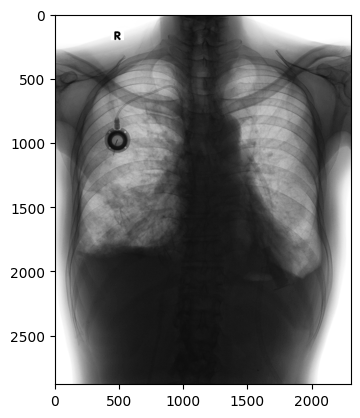

In [17]:
plt.imshow(data, cmap="grey")